[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mravanba/comp551-notebooks/blob/master/Regularization.ipynb)


# Regularization

We saw that linear least squares can be seen as maximizing the likelihood $L(w) = \prod_{(x,y) \in \mathcal{D}} p(y|x, w)$, where $p(y|x;w)$ is a Gaussian with the mean $w^\top x$ and fixed variance. In logistic regression $p(y|x, w)$ is a Bernoulli distribution with mean $\sigma(w^\top x)$.
In both cases we find the maximum likelihood solution. Instead of maximizing the likelihood, we can find the maximum of the posterior over model parameters. That is we have the prior $p(w)$, as well as the likelihood $p(y| X, w) = \prod_{x,y \in \mathcal{D}} p(y|x, w)$. Using Bayes rule the posterior is *proportional* to the product of these two terms $p(w| X,y) \propto p(w) p(y|X, w)$. Maximizing the logarithm of the posterior becomes

$$
\arg\max_w \log L(w) + \log p(w) = \arg\min_w  J(w) - \log p(w)
$$

where the cost function $J(w)$ (e.g., L2 or cross-entropy cost) is the negative of the log-likelihood.
We see that different choices of prior $p(w)$ simply add different types of penalty to our original cost function.
Choosing an isotropic Gaussian prior $p(w) = \prod_d \mathcal{N}(w_d|0, \frac{1}{\lambda})$ gives us L2 regularization:

$$
\log p(w) = \sum_d \log \mathcal{N}(w_d|0, \frac{1}{\lambda}) = - \frac{\lambda}{2} \sum_d w_d^2 + \mathrm{constant}
$$

where the constant terms are additive terms that do not depend on $w$. 
Similarly, using **Laplace prior** $p(w) = \frac{1}{2 \beta} \prod_d \exp \left (\frac{|w|}{\beta} \right)$ gives L1 regularization:

$$
\log p(w) = - {\lambda} \sum_d |w_d| + \mathrm{constant}
$$

where we set $\lambda = \frac{1}{\beta}$.

Below let's see the effect of this penalty term on the landscape of the regularized cost function in working with toy data. 

In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
import itertools

In [2]:
def plot_contour(f, x1bound, x2bound, resolution, ax):
    """
    Plot contours of a 2D function f.
    
    Visualizes the cost landscape by drawing contour lines (lines of equal cost).
    Useful for understanding how regularization changes the optimization landscape.
    
    Parameters:
    f: function that takes [w0, w1] and returns a scalar (the cost)
    x1bound: [min, max] for first parameter (e.g., w_0)
    x2bound: [min, max] for second parameter (e.g., w_1)
    resolution: number of grid points in each dimension
    ax: matplotlib axis to plot on
    """
    # Create 1D arrays of evenly spaced values for each parameter
    # linspace creates 'resolution' points between min and max
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    
    # Create 2D grid: xg and yg are both (resolution x resolution) arrays
    # xg[i,j] contains the x1 value at grid point (i,j)
    # yg[i,j] contains the x2 value at grid point (i,j)
    # This creates all combinations of (x1, x2) parameter pairs
    xg, yg = np.meshgrid(x1range, x2range)
    
    # Initialize grid for function values (cost at each grid point)
    zg = np.zeros_like(xg)
    
    # Evaluate function f at each grid point
    # itertools.product gives all (i,j) combinations efficiently
    for i, j in itertools.product(range(resolution), range(resolution)):
        zg[i, j] = f([xg[i, j], yg[i, j]])
    
    # Draw contour lines: lines connecting points with equal cost
    # 100 contour levels for smooth visualization
    ax.contour(xg, yg, zg, 100)
    
    return ax

Let's create a toy data:

In [3]:
N = 20  # Number of training samples

# Generate N random x values uniformly distributed between 0 and 10
x = np.random.rand(N) * 10

# Create noisy linear data: y = -4x + 10 + noise
# True model: w_1 = -4 (slope), w_0 = 10 (intercept)
# np.random.randn(N) adds Gaussian noise with standard deviation 2
y = -4*x + 10 + 2*np.random.randn(N)

visualize the regularized **cost function** 

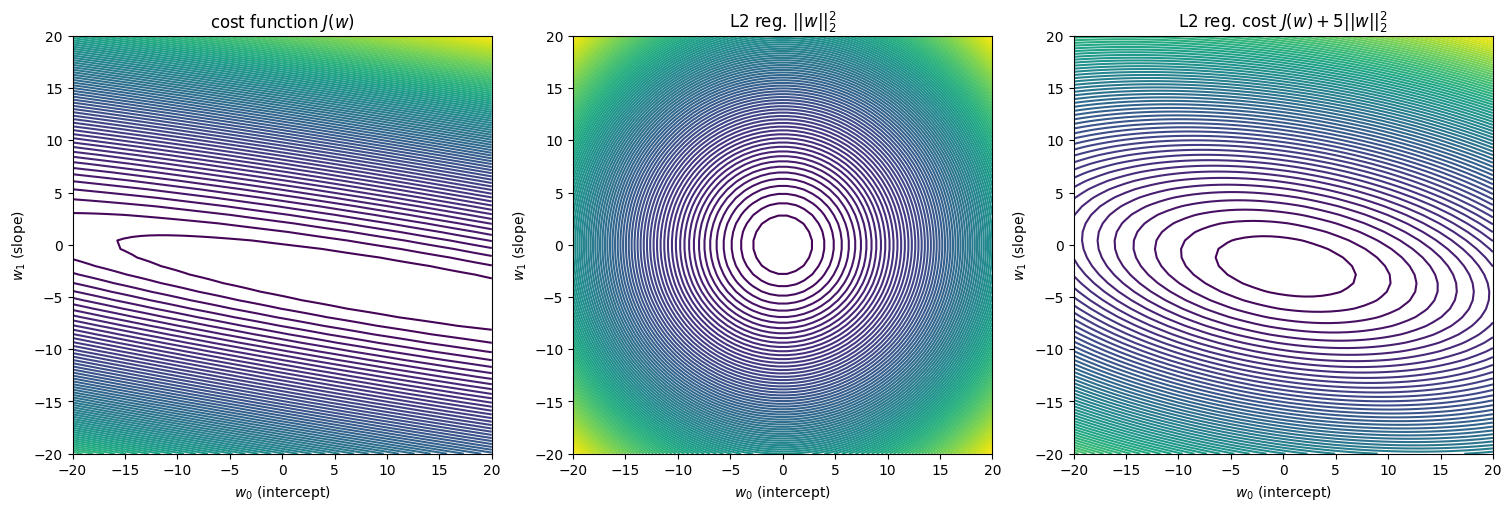

In [4]:
# Define the cost function (Mean Squared Error) as a function of weights w
# w[0] is the intercept (w_0), w[1] is the slope (w_1)
# Cost = (1/2) * average of squared errors
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)

# Define L2 regularization penalty: (1/2) * ||w||^2
# This is the squared L2 norm (Euclidean norm) of the weight vector
# Penalizes large weights, encouraging simpler models
# np.dot(w,w) efficiently computes w_0^2 + w_1^2
l2_penalty = lambda w: np.dot(w, w)/2

# Define L1 regularization penalty: ||w||_1
# This is the L1 norm (Manhattan distance) of the weight vector
# Penalizes the sum of absolute values: |w_0| + |w_1|
# Encourages sparse solutions (some weights become exactly zero)
l1_penalty = lambda w: np.sum(np.abs(w))

# Define regularized cost function: cost + lambda * penalty
# lambda = 5 controls the strength of regularization
# Higher lambda = more regularization (smaller weights)
cost_plus_l2 = lambda w: cost(w) + 5*l2_penalty(w)

# Create three subplots to compare cost landscapes
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15, 5))

# Left plot: Original cost function (no regularization)
# Shows the unregularized MSE landscape in weight space
plot_contour(cost, [-20, 20], [-20, 20], 50, axes[0])
axes[0].set_title(r'cost function $J(w)$')
axes[0].set_xlabel(r'$w_0$ (intercept)')
axes[0].set_ylabel(r'$w_1$ (slope)')

# Middle plot: L2 penalty only (no data cost)
# Shows circular contours centered at origin (0, 0)
# Penalty increases as we move away from origin in any direction
plot_contour(l2_penalty, [-20, 20], [-20, 20], 50, axes[1])
axes[1].set_title(r'L2 reg. $||w||_2^2$')
axes[1].set_xlabel(r'$w_0$ (intercept)')
axes[1].set_ylabel(r'$w_1$ (slope)')

# Right plot: Regularized cost function (cost + L2 penalty)
# Combines data fit with preference for small weights
# Minimum shifts toward origin compared to unregularized cost
plot_contour(cost_plus_l2, [-20, 20], [-20, 20], 50, axes[2])
axes[2].set_title(r'L2 reg. cost $J(w) + 5 ||w||_2^2$')
axes[2].set_xlabel(r'$w_0$ (intercept)')
axes[2].set_ylabel(r'$w_1$ (slope)')

plt.show()

Let's use the `GradientDescent` and `LinearRegression` classes from the previous lecture. The only update we have made is in using `l2_reg` which sets the regularization coefficient $\lambda$ for L2 regularization. This information is used when calculating the gradient to perform weight decay. Note that a good practice is to *avoid penalizing the bias* $w_0$. Here, for the sake of visualization we penalize the bias as well.

In [5]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        """
        Initialize Gradient Descent optimizer.
        
        Parameters:
        learning_rate: step size for each gradient descent iteration (also called alpha)
        max_iters: maximum number of iterations before stopping
        epsilon: convergence threshold - stop when ||gradient|| < epsilon
        record_history: if True, store weight values at each iteration for visualization
        """
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            # Initialize list to store weight history for visualization
            # Each entry will be a weight vector at one iteration
            self.w_history = []
            
    def run(self, gradient_fn, x, y, w):
        """
        Run gradient descent optimization.
        
        Parameters:
        gradient_fn: function that computes gradient given (x, y, w)
        x: input features, shape (N, D)
        y: target values, shape (N,)
        w: initial weights, shape (D,)
        
        Returns:
        w: optimized weights after convergence or max_iters
        """
        # Initialize gradient norm to infinity (ensures loop starts)
        grad = np.inf
        
        # Iteration counter
        t = 1
        
        # Gradient descent loop
        # Stop when: (1) gradient is small enough, OR (2) max iterations reached
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            # Compute gradient at current weights
            grad = gradient_fn(x, y, w)
            
            # Update weights: w_new = w_old - learning_rate * gradient
            # This moves "downhill" on the cost surface
            w = w - self.learning_rate * grad
            
            if self.record_history:
                # Store current weights for later visualization
                self.w_history.append(w)
            
            t += 1
        
        return w
    
class LinearRegression:
    def __init__(self, add_bias=True, l2_reg=0):
        """
        Initialize Linear Regression model with optional L2 regularization.
        
        Parameters:
        add_bias: if True, adds an intercept term (bias/w_0) to the model
        l2_reg: L2 regularization coefficient (lambda)
                lambda = 0 means no regularization
                lambda > 0 penalizes large weights (weight decay)
        """
        self.add_bias = add_bias
        self.l2_reg = l2_reg
        pass
            
    def fit(self, x, y, optimizer):
        """
        Fit the linear regression model using gradient descent.
        
        Parameters:
        x: input features, shape (N,) or (N, D) where N=samples, D=features
        y: target values, shape (N,)
        optimizer: GradientDescent optimizer instance
        
        Returns:
        self: fitted model
        """
        # If x is 1D (shape: (N,)), convert to 2D column vector (shape: (N, 1))
        # x[:, None] adds a new axis, transforming (N,) -> (N, 1)
        if x.ndim == 1:
            x = x[:, None]
        
        if self.add_bias:
            N = x.shape[0]  # Number of samples
            # Add bias feature: append a column of ones to x
            # np.column_stack horizontally stacks x and the ones column
            # Result: if x is (N, D), new x is (N, D+1)
            x = np.column_stack([x, np.ones(N)])
        
        N, D = x.shape  # N = samples, D = features (including bias if added)
        
        def gradient(x, y, w):
            """
            Compute gradient of regularized cost function.
            
            Gradient = (1/N) * x^T @ (x@w - y) + lambda * w
            
            The regularization term (lambda * w) implements weight decay:
            it pulls weights toward zero at each iteration.
            
            Parameters:
            x: input features with bias, shape (N, D)
            y: target values, shape (N,)
            w: current weights, shape (D,)
            
            Returns:
            grad: gradient vector, shape (D,)
            """
            # Compute predictions: yh = x @ w, shape (N,)
            yh = x @ w 
            
            N, D = x.shape
            
            # Compute gradient of MSE cost: (1/2N) * x^T @ (yh - y)
            # x has shape (N, D)
            # (yh - y) has shape (N,)
            # np.dot(yh - y, x) computes (yh - y)^T @ x, result is (D,)
            # Factor of 0.5 comes from derivative of (1/2) * squared error
            grad = .5*np.dot(yh - y, x)/N
            
            # Add L2 regularization gradient: lambda * w
            # This is the derivative of (lambda/2) * ||w||^2
            # Pushes weights toward zero (weight decay)
            grad += self.l2_reg * w
            
            return grad
        
        # Initialize weights to zero
        w0 = np.zeros(D)
        
        # Run gradient descent to find optimal weights
        self.w = optimizer.run(gradient, x, y, w0)
        
        return self
    
    def predict(self, x):
        """
        Predict target values for input x using learned weights.
        
        Parameters:
        x: input features, shape (N,) or (N, D)
        
        Returns:
        yh: predicted values, shape (N,)
        """
        if self.add_bias:
            # Add bias feature: append a column of ones
            # Note: This assumes x is already shaped correctly
            x = np.column_stack([x, np.ones(N)])
        
        # Matrix multiplication: x @ w computes predictions
        # If x is (N, D+1) and w is (D+1,), result is (N,)
        yh = x @ self.w
        
        return yh

Now let's visualize the landscape of regularized cost function for different amounts of regularization and see the effect of regularization on gradient descent.

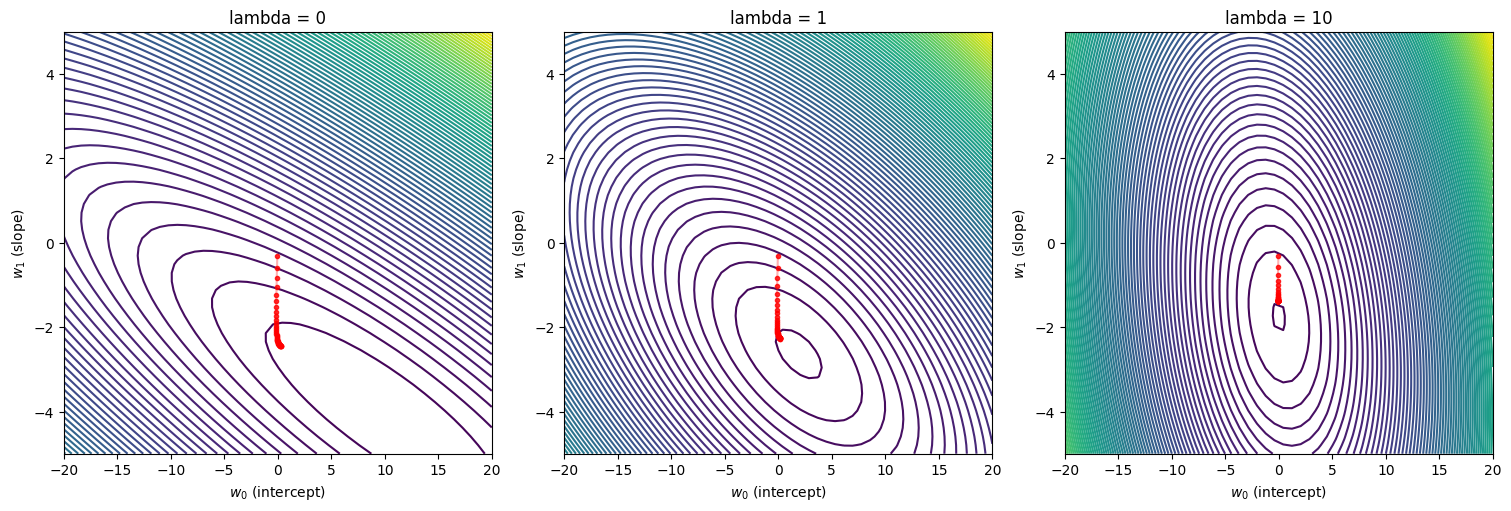

In [6]:
# Define regularized cost function that combines MSE with L2 penalty
# w: weight vector [w_0, w_1]
# reg: regularization coefficient (lambda)
# Returns: (1/2) * mean((y_pred - y_true)^2) + (reg/2) * ||w||^2
cost = lambda w, reg: .5*np.mean((w[0] + w[1]*x - y)**2) + reg*np.dot(w, w)/2

# List of regularization strengths to visualize
# reg = 0: no regularization (standard MSE)
# reg = 1: mild regularization
# reg = 10: strong regularization (heavily penalizes large weights)
reg_list = [0, 1, 10]

# Create side-by-side plots to compare different regularization strengths
fig, axes = plt.subplots(ncols=len(reg_list), nrows=1, constrained_layout=True, figsize=(15, 5))

# Iterate over each regularization coefficient
for i, reg_coef in enumerate(reg_list):
    # Create optimizer with history tracking enabled
    # This records the weight values at each iteration
    # learning_rate=.01: step size for gradient descent
    # max_iters=50: limit iterations for visualization (doesn't fully converge)
    optimizer = GradientDescent(learning_rate=.01, max_iters=50, record_history=True)
    
    # Create and fit linear regression model with current regularization strength
    model = LinearRegression(l2_reg=reg_coef)
    model.fit(x, y, optimizer)
    
    # Create cost function with current regularization coefficient
    # This "freezes" reg_coef so we can plot cost(w)
    current_cost = lambda w: cost(w, reg_coef)
    
    # Plot the cost landscape (contours show equal-cost curves)
    plot_contour(current_cost, [-20, 20], [-5, 5], 50, axes[i])
    
    # Extract weight history from optimizer
    # w_history is a list of weight vectors, one per iteration
    # np.vstack stacks them into a 2D array of shape (T, 2)
    # where T is the number of iterations and 2 is for [w_0, w_1]
    w_hist = np.vstack(optimizer.w_history)  # Shape: (T, 2)
    
    # Plot the optimization path on the cost landscape
    # w_hist[:,1] selects all rows, column 1 (w_0 values) - x-coordinates
    # w_hist[:,0] selects all rows, column 0 (w_1 values) - y-coordinates
    # '.r' plots red dots at each iteration
    axes[i].plot(w_hist[:, 1], w_hist[:, 0], '.r', alpha=.8)
    
    # Connect the dots with a red line to show the path
    # '-r' creates a red line, alpha=.3 makes it semi-transparent
    axes[i].plot(w_hist[:, 1], w_hist[:, 0], '-r', alpha=.3)
    
    # Label the axes and set title
    axes[i].set_xlabel(r'$w_0$ (intercept)')
    axes[i].set_ylabel(r'$w_1$ (slope)')
    axes[i].set_title(f'lambda = {reg_coef}')
    
    # Set consistent axis limits for easy comparison
    axes[i].set_xlim([-20, 20])
    axes[i].set_ylim([-5, 5])

plt.show()

The plots show that L2 regularization helps with the convergence of gradient descent.